to aquire af lep b nircam coron data:

1st epoch: jwst_download.py -v --instrument nircam --propID 4558 -f uncal.fits --date_select 2023-10-11 2023-10-14

2nd epoch: jwst_download.py -v --instrument nircam --propID 4558 -f uncal.fits --date_select 2023-11-01 2023-11-03

3rd epoch: jwst_download.py -v --instrument nircam --propID 4558 -f uncal.fits --date_select 2024-01-01+

In [1]:
from __future__ import division

# =============================================================================
# IMPORTS
# =============================================================================

import os
import pdb
import sys 

import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import numpy as np

from spaceKLIP import database, coron1pipeline, coron2pipeline, coron3pipeline, pyklippipeline, imagetools, analysistools

# plotting
import matplotlib.pyplot as plt
# plt.style.use('/Users/wbalmer/balmer.mplstyle')
# import seaborn as sb
# sb.set_context('talk')

import webbpsf_ext
webbpsf_ext.setup_logging('WARN', verbose=False)

/Users/rkane/miniconda3/envs/spaceklip3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
from spaceKLIP.mast import query_coron_datasets
query_coron_datasets('NIRCam','F480M','MASK210R')
#a.sort('program')

visit_id,start time,filter,coronmsk,targname,obslabel,duration,numdthpt,program,title,pi_name
str12,str16,str1,str1,str1,str1,float64,int64,int64,str1,str1


In [2]:
# Set the input and output directories and grab the input FITS files.
reduced = True
cleanalign = False
aligned = False

blur = True
pad = True
coadd = False
crop = True

# epoch = '_e1'
epoch = '_e3'

data_root='DATA/JWST/NIRCam/04558/F444W/'

if aligned and coadd:
    input_dir = os.path.join(data_root, 'coadded/')
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif aligned:
    # input_dir = './spaceklip/aligned/'
    input_dir = os.path.join(data_root, 'aligned/')
    # input_dir = './spaceklip/aligned/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif cleanalign:
    input_dir = os.path.join(data_root, 'recentered/')
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif reduced:
    input_dir = os.path.join(data_root, 'stage2/')
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])
else:
    # input_dir = './04558/'
    input_dir = os.path.join(data_root, 'uncal/')
    # input_dir = '/Users/wbalmer/data/jwst/aflep/uncal_e3/'
    # input_dir = './uncal_e2/'
    # input_dir = './uncal_e3/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])

output_dir = data_root

In [4]:
fitsfiles = fitsfiles[44:]
fitsfiles

['DATA/JWST/NIRCam/04558/F200W/stage2/jw04558007001_03106_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558007001_03107_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558008001_03106_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558008001_03107_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00002_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00003_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00004_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00005_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00006_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00007_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00008_n

In [3]:
# Initialize the spaceKLIP database and read the input FITS files.
Database = database.Database(output_dir=output_dir)
Database.read_jwst_s012_data(datapaths=fitsfiles,
                             psflibpaths=None,
                             bgpaths=None)

[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R
TYPE  EXP_TYPE DATAMODL TELESCOP ... BUNIT       ROLL_REF      BLURFWHM
---- --------- -------- -------- ... ------ ------------------ --------
 SCI NRC_CORON   STAGE2     JWST ... MJy/sr  42.12299471767102      nan
 SCI NRC_CORON   STAGE2     JWST ... MJy/sr 52.122757615119625      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  48.73634202493655      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 48.736338809514756      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 48.736340191662734      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  48.73634143347705      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  48.73634128496211      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  48.73633272284464      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  48.73634526214159      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr

In [4]:
Database.summarize()

NIRCAM_F444W_MASK335R
	STAGE2: 11 files;	2 SCI, 9 REF


In [27]:
# select a subset of obs, usually we are only interested in F200W+F444W

select_obs = [
              'JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R',
              # 'JWST_NIRCAM_NRCALONG_F356W_MASKRND_MASK335R_SUB320A335R',
              # 'JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R',
              ]

Database.obs = {k:Database.obs[k] for k in select_obs}

In [5]:
if not reduced:
    coron1pipeline.run_obs(database=Database,
                           steps={'saturation': {'n_pix_grow_sat': 1,
                                                 'grow_diagonal': False},
                                  'refpix': {'odd_even_columns': True,
                                             'odd_even_rows': True,
                                             'nlower': 4,
                                             'nupper': 4,
                                             'nleft': 4,
                                             'nright': 4,
                                             'nrow_off': 0,
                                             'ncol_off': 0},
                                  'dark_current': {'skip': True},
                                  'persistence': {'skip': True},
                                  'jump': {'rejection_threshold': 4.,
                                           'three_group_rejection_threshold': 4.,
                                           'four_group_rejection_threshold': 4.,
                                           'maximum_cores': 'all'},
                                  'ramp_fit': {'save_calibrated_ramp': False,
                                               'maximum_cores': 'all'}},
                            subdir='stage1')

In [6]:
if not reduced:
    coron2pipeline.run_obs(database=Database,
                           steps={'outlier_detection': {'skip': False}},
                           subdir='stage2')

In [7]:
ImageTools = imagetools.ImageTools(Database)

In [8]:
if not cleanalign:
    ImageTools.update_nircam_centers()

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw04558007001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (150.10, 174.20), new = (150.28, 173.99)
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw04558008001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (150.10, 174.20), new = (150.28, 173.99)
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw04558009001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (150.10, 174.20), new = (150.28, 173.99)
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw04558009001_03106_00002_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old =

In [9]:
if not cleanalign:
    ImageTools.subtract_median(types=['SCI', 'SCI_TA', 'SCI_BG', 'REF', 'REF_TA', 'REF_BG'],
                                   subdir='medsub')

[spaceKLIP.imagetools:INFO] Median subtraction using method=border
[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw04558007001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Median subtraction: mean of frame median = 0.05
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw04558008001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Median subtraction: mean of frame median = 0.06
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw04558009001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Median subtraction: mean of frame median = 0.10
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw04558009001_03106_00002_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Median subtraction: mean of frame median = 0.11
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw04558009001_03106_00003_nrcalong_calint

In [10]:
# Fix bad pixels using custom spaceKLIP routines. Multiple routines can be
# combined in a custom order by joining them with a + sign.
# - bpclean: use sigma clipping to find additional bad pixels.
# - custom: use custom map to find additional bad pixels.
# - timemed: replace pixels which are only bad in some frames with their
#            median value from the good frames.
# - dqmed:   replace bad pixels with the median of surrounding good
#            pixels.
# - medfilt: replace bad pixels with an image plane median filter.
if not cleanalign:
    ImageTools.fix_bad_pixels(method='bpclean+timemed+dqmed+medfilt',
                              bpclean_kwargs={'sigclip': 5,
                                              'shift_x': [-1, 0, 1],
                                              'shift_y': [-1, 0, 1]},
                              custom_kwargs={},
                              timemed_kwargs={},
                              dqmed_kwargs={'shift_x': [-1, 0, 1],
                                            'shift_y': [-1, 0, 1]},
                              medfilt_kwargs={'size': 4},
                              subdir='bpcleaned')

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Method bpclean: jw04558007001_03106_00001_nrcalong_calints.fits
Frame 35/35, iteration 4
[spaceKLIP.imagetools:INFO]   --> Method bpclean: identified 10361 additional bad pixel(s) -- 0.29%
[spaceKLIP.imagetools:INFO]   --> Method timemed: jw04558007001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Method timemed: fixing 9030 bad pixel(s) -- 0.25%
[spaceKLIP.imagetools:INFO]   --> Method dqmed: jw04558007001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Method dqmed: fixing 14105 bad pixel(s) -- 0.39%
[spaceKLIP.imagetools:INFO]   --> Method medfilt: jw04558007001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Method medfilt: fixing 0 bad pixel(s) -- 0.00%
[spaceKLIP.imagetools:INFO]   --> Method bpclean: jw04558008001_03106_00001_nrcalong_calints.fits
Frame 35/35, iteration 4
[spaceKLIP.i

In [11]:
if not cleanalign:
    ImageTools.replace_nans(cval=0.,
                            types=['SCI', 'SCI_BG', 'REF', 'REF_BG'],
                            subdir='nanreplaced')

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Nan replacement: jw04558007001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Nan replacement: replaced 0 nan pixel(s) with value 0.0 -- 0.00%
[spaceKLIP.imagetools:INFO]   --> Nan replacement: jw04558008001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Nan replacement: replaced 0 nan pixel(s) with value 0.0 -- 0.00%
[spaceKLIP.imagetools:INFO]   --> Nan replacement: jw04558009001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Nan replacement: replaced 0 nan pixel(s) with value 0.0 -- 0.00%
[spaceKLIP.imagetools:INFO]   --> Nan replacement: jw04558009001_03106_00002_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Nan replacement: replaced 0 nan pixel(s) with value 0.0 -- 0.00%
[spaceKLIP.imagetools:INFO]   --> Nan replacement: jw04558009001_03106_00003_nrcalong_calints.fits
[spaceK

In [12]:
if not cleanalign:
    if blur:
        ImageTools.blur_frames()

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Frame blurring: jw04558007001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame blurring: factor = 0.456
[spaceKLIP.imagetools:INFO]   --> Frame blurring: jw04558008001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame blurring: factor = 0.456
[spaceKLIP.imagetools:INFO]   --> Frame blurring: jw04558009001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame blurring: factor = 0.456
[spaceKLIP.imagetools:INFO]   --> Frame blurring: jw04558009001_03106_00002_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame blurring: factor = 0.456
[spaceKLIP.imagetools:INFO]   --> Frame blurring: jw04558009001_03106_00003_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame blurring: factor = 0.456
[spaceKLIP.imagetools:INFO]   --> Frame blurring: jw04558009001_03106_00004_nrcalon

In [13]:
if not cleanalign:
    if crop:
        ImageTools.crop_frames(npix=10)
    
    if pad:
        ImageTools.pad_frames(
                              npix=[32, 33, 32, 33],
                              # npix=[1, 144, 73, 72], # shortwave
                              types=['SCI', 'SCI_BG', 'REF', 'REF_BG'],
                              cval=0.
                             )
        

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Frame cropping: jw04558007001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame cropping: old shape = (320, 320), new shape = (300, 300)
[spaceKLIP.imagetools:INFO]   --> Frame cropping: jw04558008001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame cropping: old shape = (320, 320), new shape = (300, 300)
[spaceKLIP.imagetools:INFO]   --> Frame cropping: jw04558009001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame cropping: old shape = (320, 320), new shape = (300, 300)
[spaceKLIP.imagetools:INFO]   --> Frame cropping: jw04558009001_03106_00002_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame cropping: old shape = (320, 320), new shape = (300, 300)
[spaceKLIP.imagetools:INFO]   --> Frame cropping: jw04558009001_03106_00003_nrcalong_calints.fits
[spaceKLIP.imagetool

In [14]:
if not cleanalign:
    ImageTools.recenter_frames(
        spectral_type='F8V',
    )

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw04558007001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: generating WebbPSF image for absolute centering (this might take a while)
[spaceKLIP.psf:INFO] Generating on-axis and off-axis PSFs...
[spaceKLIP.psf:INFO]   Done.
[spaceKLIP.imagetools:INFO]   --> Recenter frames: star offset from coronagraph center (dx, dy) = (0.05, 0.39) pix
[spaceKLIP.imagetools:INFO]  Plot saved in DATA/JWST/NIRCam/04558/F444W/recentered/JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R_recenter.pdf
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw04558007001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: median required shift = 1068.81 mas
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw04558008001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --

In [15]:
if not aligned:
    ImageTools.align_frames(
        subdir='aligned',
        method='fourier',
        align_algo='leastsq',
    )

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Align frames: jw04558007001_03106_00001_nrcalong_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = nan mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw04558008001_03106_00001_nrcalong_calints.fits


KeyboardInterrupt: 

In [21]:
shifts[9]

array([[-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ],
       [-0.16019463, -0.09611659,  1.        ]])

In [39]:
# if not aligned and coadd:
ImageTools.coadd_frames()

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Frame coadding: jw04558007001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame coadding: 1 coadd(s) of 35 frame(s)
[spaceKLIP.imagetools:INFO]   --> Frame coadding: jw04558007001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame coadding: 1 coadd(s) of 35 frame(s)
[spaceKLIP.imagetools:INFO]   --> Frame coadding: jw04558008001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame coadding: 1 coadd(s) of 35 frame(s)
[spaceKLIP.imagetools:INFO]   --> Frame coadding: jw04558008001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame coadding: 1 coadd(s) of 35 frame(s)
[spaceKLIP.imagetools:INFO]   --> Frame coadding: jw04558009001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame coadding: 1 coadd(s) of 15 frame(s)
[spaceKLIP.imagetools:INFO]   --> Frame coaddi

In [24]:
import platform
if platform.processor() == 'arm':
    os.environ["OPENBLAS_NUM_THREADS"] = "1"
    os.environ["OMP_NUM_THREADS"] = "1" 
# once other image reduction steps are done, run this so that pyklip.parallelized doesn't kill your apple chip

In [41]:
pyklippipeline.run_obs(database=Database,
                       kwargs={'mode': ['ADI+RDI'],
                               'annuli': [4],
                               # 'movement': [0.5],
                               'subsections': [3],
                               'numbasis': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                               #'numbasis': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                               'algo': 'klip'},
                       subdir='klipsub'
                      )

[spaceKLIP.pyklippipeline:INFO] --> Concatenation JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.pyklippipeline:INFO]   --> pyKLIP: mode = ADI+RDI, annuli = 4, subsections = 3
Begin align and scale images for each wavelength
Wavelength 4.439e-06 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 12


  0%|          | 0/12 [00:00<?, ?it/s]

Closing threadpool
section is too small (0 pixels), skipping...
section is too small (0 pixels), skipping...
section is too small (0 pixels), skipping...
Derotating Images...
Writing Images to directory /Users/rkane/Documents/DATA/JWST/NIRCam/04558/F444W/klipsub
wavelength collapsing reduced data of shape (b, N, wv, y, x):(9, 70, 1, 365, 365)
[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R
 TYPE   EXP_TYPE DATAMODL ...        KLMODES         BUNIT       BLURFWHM     
------ --------- -------- ... ---------------------- ------ ------------------
PYKLIP NRC_CORON   STAGE3 ... 1,2,3,4,5,10,20,50,100 MJy/sr 1.0735033504904044


In [42]:
# # select a subset of obs, usually we are only interested in F200W+F444W

# select_obs = [
#               # 'JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R',
#               # 'JWST_NIRCAM_NRCALONG_F356W_MASKRND_MASK335R_SUB320A335R',
#               'JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R',
#               ]

# Database.obs = {k:Database.obs[k] for k in select_obs}
# Database.red = {k:Database.red[k] for k in select_obs}

In [43]:
# Database.red['JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R']

In [44]:
Analysis = analysistools.AnalysisTools(Database)

# companions = [[.3173, .0663, 1e-4]]
companions = [[.3147, .0531, 1e-4]]

# companion_masks = [[.3173, .0663, 2]]
companion_masks = [[.3147, .0531, 2]]

# blob 119.3 and 240.2 pixels
# cen = 320//2
# companions = [[(cen-119.3)*0.063, (240.2-cen)*0.063, 1e-6]]

starfile = './AFLepA.vot'

mstar_err = 0.0
# {'F200W':0.002773909429007033, 
#              'F356W':0.0302418599954501, 
#              'F444W':0.037934753620330594}

[spaceKLIP.analysistools:INFO] Copying starfile ./AFLepA.vot to ./spaceklip/rawcon_e3/AFLepA.vot
[spaceKLIP.analysistools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.analysistools:INFO] Analyzing file ./spaceklip/klipsub_e3/ADI+RDI_NANNU4_NSUBS3_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[py.warnings:WARNING] /Users/wbalmer/miniconda3/envs/spaceklip/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
[py.warnings:WARNING]   a.partition(kth, axis=axis, kind=kind, order=order)
[py.warnings:WARNING] 
[py.warnings:WARNING] /Users/wbalmer/webbpsf_ext/webbpsf_ext/spectra.py:752: UserWarning: Warning: converting a masked element to nan.
[py.warnings:WARNING]   uflux_e = np.array(uflux_e)
[py.warnings:WARNING] 
[py.warnings:WARNING] /Users/wbalmer/spaceKLIP/spaceKLIP/starphot.py:194: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
[py.warnings:WARNING]   with importlib.resources.open_text(f'spaceKLIP.resources.PCEs.{instrume}', f'{filt}.txt') as bandpass_file:
[py.warnings:WARNING] 


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model


[py.warnings:WARNING] /Users/wbalmer/src/webbpsf/webbpsf/detectors.py:59: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/wbalmer/data/webbpsf-data/NIRCam/IPC/KERNEL_IPC_CUBE.fits'>
[py.warnings:WARNING]   kernel_ipc = CustomKernel(fits.open(sca_path)[det2sca[det]].data[0])  # we read the first slice in the cube
[py.warnings:WARNING] 
[py.warnings:WARNING] /Users/wbalmer/src/webbpsf/webbpsf/detectors.py:65: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/wbalmer/data/webbpsf-data/NIRCam/IPC/KERNEL_PPC_CUBE.fits'>
[py.warnings:WARNING]   kernel_ppc = CustomKernel(fits.open(sca_path_ppc)[det2sca[det]].data[0])  # we read the first slice in the cube
[py.warnings:WARNING] 


[spaceKLIP.analysistools:INFO]   Masking out 1 known companions using provided parameters.
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
[spaceKLIP.analysistools:INFO]   Measuring raw contrast for masked data
Contrast results and plots saved to ./spaceklip/rawcon_e3/ADI+RDI_NANNU4_NSUBS3_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, ./spaceklip/rawcon_e3/ADI+RDI_NANNU4_NSUBS3_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy


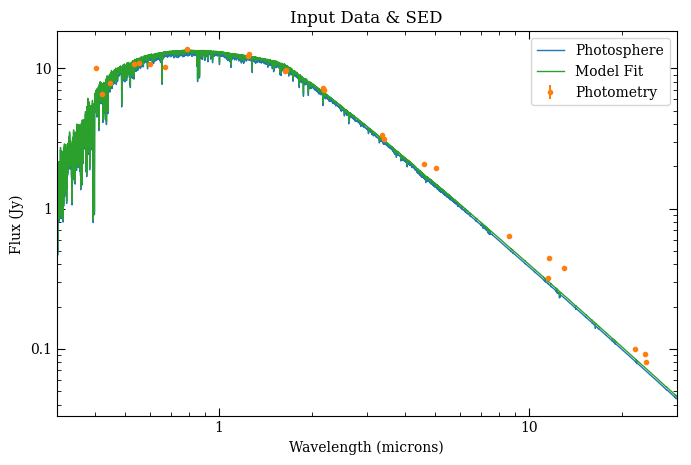

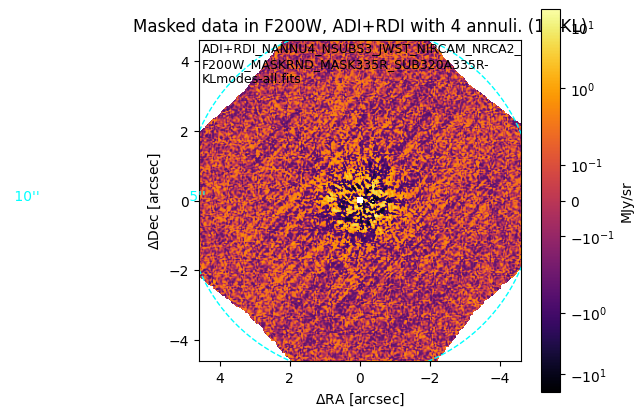

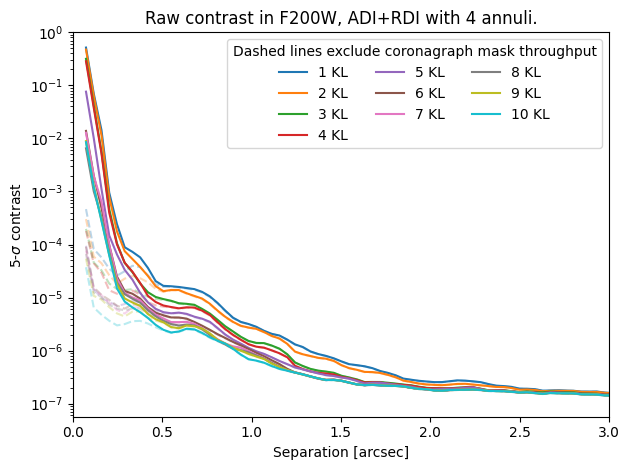

In [45]:
Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir=f'rawcon{epoch}')

In [46]:
import platform
if platform.processor() == 'arm':
    os.environ["OPENBLAS_NUM_THREADS"] = "1"
    os.environ["OMP_NUM_THREADS"] = "1" 

[spaceKLIP.analysistools:INFO] Copying starfile ./AFLepA.vot to ./spaceklip/rawcon/AFLepA.vot
[spaceKLIP.analysistools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.analysistools:INFO] Analyzing file ./spaceklip/klipsub_e3/ADI+RDI_NANNU4_NSUBS3_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[py.warnings:WARNING] /Users/wbalmer/miniconda3/envs/spaceklip/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
[py.warnings:WARNING]   a.partition(kth, axis=axis, kind=kind, order=order)
[py.warnings:WARNING] 
[py.warnings:WARNING] /Users/wbalmer/webbpsf_ext/webbpsf_ext/spectra.py:752: UserWarning: Warning: converting a masked element to nan.
[py.warnings:WARNING]   uflux_e = np.array(uflux_e)
[py.warnings:WARNING] 
[py.warnings:WARNING] /Users/wbalmer/spaceKLIP/spaceKLIP/starphot.py:194: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
[py.warnings:WARNING]   with importlib.resources.open_text(f'spaceKLIP.resources.PCEs.{instrume}', f'{filt}.txt') as bandpass_file:
[py.warnings:WARNING] 


[spaceKLIP.psf:INFO]   --> Generating WebbPSF model


[py.warnings:WARNING] /Users/wbalmer/src/webbpsf/webbpsf/detectors.py:59: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/wbalmer/data/webbpsf-data/NIRCam/IPC/KERNEL_IPC_CUBE.fits'>
[py.warnings:WARNING]   kernel_ipc = CustomKernel(fits.open(sca_path)[det2sca[det]].data[0])  # we read the first slice in the cube
[py.warnings:WARNING] 
[py.warnings:WARNING] /Users/wbalmer/src/webbpsf/webbpsf/detectors.py:65: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/wbalmer/data/webbpsf-data/NIRCam/IPC/KERNEL_PPC_CUBE.fits'>
[py.warnings:WARNING]   kernel_ppc = CustomKernel(fits.open(sca_path_ppc)[det2sca[det]].data[0])  # we read the first slice in the cube
[py.warnings:WARNING] 


[spaceKLIP.analysistools:INFO]   Masking out 1 known companions using provided parameters.
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
[spaceKLIP.analysistools:INFO]   Measuring raw contrast for masked data
Contrast results and plots saved to ./spaceklip/rawcon/ADI+RDI_NANNU4_NSUBS3_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, ./spaceklip/rawcon/ADI+RDI_NANNU4_NSUBS3_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.psf:INFO]   --> Generating WebbPSF model


[py.warnings:WARNING] /Users/wbalmer/src/webbpsf/webbpsf/detectors.py:59: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/wbalmer/data/webbpsf-data/NIRCam/IPC/KERNEL_IPC_CUBE.fits'>
[py.warnings:WARNING]   kernel_ipc = CustomKernel(fits.open(sca_path)[det2sca[det]].data[0])  # we read the first slice in the cube
[py.warnings:WARNING] 
[py.warnings:WARNING] /Users/wbalmer/src/webbpsf/webbpsf/detectors.py:65: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/wbalmer/data/webbpsf-data/NIRCam/IPC/KERNEL_PPC_CUBE.fits'>
[py.warnings:WARNING]   kernel_ppc = CustomKernel(fits.open(sca_path_ppc)[det2sca[det]].data[0])  # we read the first slice in the cube
[py.warnings:WARNING] 


[spaceKLIP.analysistools:INFO] Analyzing file ./spaceklip/klipsub_e3/ADI+RDI_NANNU4_NSUBS3_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits


[py.warnings:WARNING] /Users/wbalmer/miniconda3/envs/spaceklip/lib/python3.11/site-packages/astropy/wcs/wcs.py:807: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to    97.836350 from OBSGEO-[XYZ].
[py.warnings:WARNING] Set OBSGEO-B to     9.857435 from OBSGEO-[XYZ].
[py.warnings:WARNING] Set OBSGEO-H to 1676339711.622 from OBSGEO-[XYZ]'.
[py.warnings:WARNING]   warnings.warn(
[py.warnings:WARNING] 
[py.warnings:WARNING] /Users/wbalmer/miniconda3/envs/spaceklip/lib/python3.11/site-packages/astropy/wcs/wcs.py:807: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to    97.839257 from OBSGEO-[XYZ].
[py.warnings:WARNING] Set OBSGEO-B to     9.859476 from OBSGEO-[XYZ].
[py.warnings:WARNING] Set OBSGEO-H to 1676326314.996 from OBSGEO-[XYZ]'.
[py.warnings:WARNING]   warnings.warn(
[py.warnings:WARNING] 
[py.warnings:WARNING] /Users/wbalmer/miniconda3/envs/spaceklip/lib/python3.11/site-packages/astropy/wcs/wcs.py:807: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L t

[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> 5/132 source positions not suitable for injection.


  0%|                                                   | 0/127 [00:00<?, ?it/s]/Users/wbalmer/pyklip/pyklip/klip.py:157: RuntimeWarning: invalid value encountered in sqrt
  kl_basis = kl_basis * (1. / np.sqrt(evals * (np.size(sci) - 1)))[None, :]  #multiply a value for each row
[py.warnings:WARNING] /Users/wbalmer/miniconda3/envs/spaceklip/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:476: RuntimeWarning: gtol=0.000000 is too small, func(x) is orthogonal to the columns of
[py.warnings:WARNING]   the Jacobian to machine precision.
[py.warnings:WARNING]   warnings.warn(errors[info][0], RuntimeWarning)
[py.warnings:WARNING] 
[py.warnings:WARNING] /Users/wbalmer/miniconda3/envs/spaceklip/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
[py.warnings:WARNING]   slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
[py.warnings:WARNING] 
[py.warnings:WARNING] /Users/wbalmer/miniconda3/envs/spaceklip/lib/python3.11/

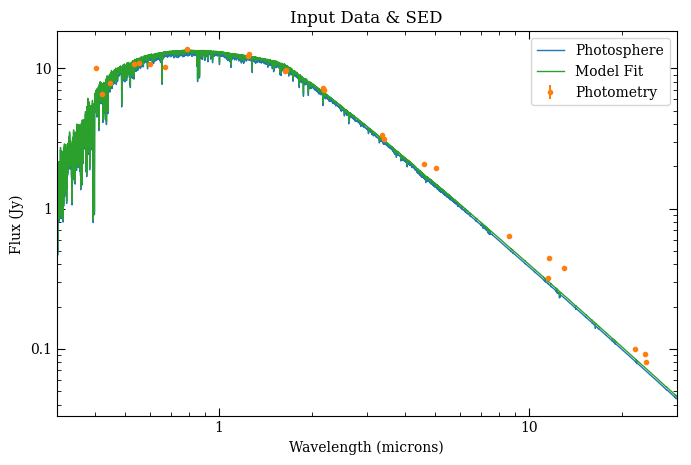

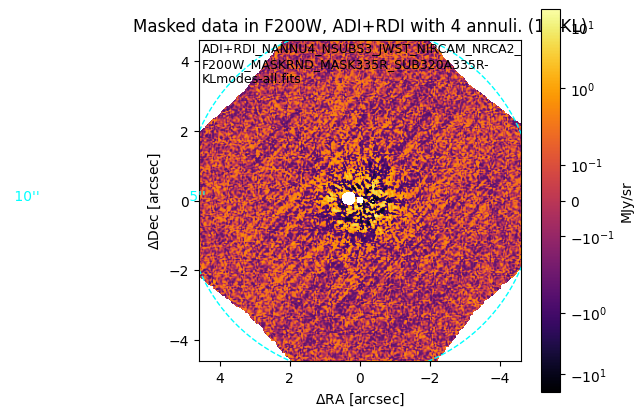

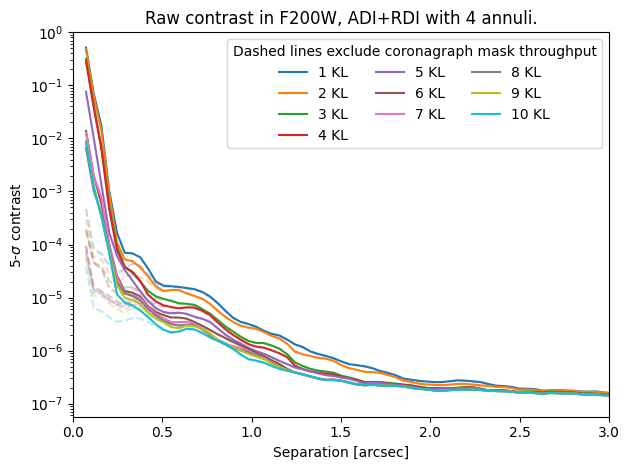

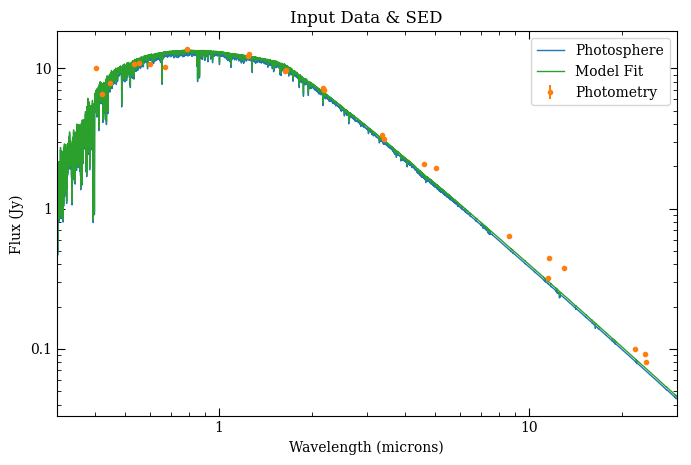

In [47]:
inj_seps = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5, 3.0]
Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companion_masks, plot_xlim=(0,3), subdir='rawcon')
Analysis.calibrate_contrast(
                            companions=companion_masks,
                            injection_seps=inj_seps,
                            plot_xlim=(0,3),
                            subdir=f'calcon{epoch}_noiwa_studentt'
                           )

In [25]:
import platform
if platform.processor() == 'arm':
    os.environ["OPENBLAS_NUM_THREADS"] = "1"
    os.environ["OMP_NUM_THREADS"] = "1" 
# once other image reduction steps are done, run this so that pyklip.parallelized doesn't kill your apple chip

In [26]:
# Analysis.extract_companions(companions, 
#                             starfile, 
#                             mstar_err, 
#                             klmode=10,
#                             spectral_type='F8V', 
#                             fitmethod='mcmc',
#                             fitkernel='matern32',
#                             # subdir=f'companions{epoch}'
#                             # subdir='companions_e1_nestedfix'
#                             subdir='companions_e3_testiwaoff'
#                            )

In [27]:
crash

NameError: name 'crash' is not defined

In [ ]:
# Set the input and output directories and grab the input FITS files.
reduced = True
cleanalign = True
aligned = True

pad = False
coadd = False
crop = False

if aligned and coadd:
    input_dir = './spaceklip/coadded/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif aligned:
    # input_dir = './spaceklip/aligned/'
    input_dir = './spaceklip/aligned_e3/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif cleanalign:
    input_dir = './spaceklip/nanreplaced/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif reduced:
    input_dir = './spaceklip/stage2/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])
else:
    # input_dir = './04558/'
    # input_dir = './uncal_e1/'
    # input_dir = './uncal_e2/'
    input_dir = './uncal_e3/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])

output_dir = './spaceklip/'

In [ ]:
# Initialize the spaceKLIP database and read the input FITS files.
Database = database.Database(output_dir=output_dir)
Database.read_jwst_s012_data(datapaths=fitsfiles,
                             psflibpaths=None,
                             bgpaths=None)

In [ ]:
select_obs = [
              # 'JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R',
              'JWST_NIRCAM_NRCALONG_F356W_MASKRND_MASK335R_SUB320A335R',
              'JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R',
              ]

Database.obs = {k:Database.obs[k] for k in select_obs}

In [ ]:
ImageTools = imagetools.ImageTools(Database)

In [ ]:
pyklippipeline.run_obs(database=Database,
                       kwargs={'mode': ['ADI+RDI'],
                               'annuli': [4],
                               # 'movement': [0.5],
                               'subsections': [3],
                               'numbasis': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                               'algo': 'klip'},
                       subdir='klipsub_e3')

In [ ]:
Analysis = analysistools.AnalysisTools(Database)

# companions = [[.3173, .0663, 1e-4]]
companions = [[.3147, .0531, 1e-4]]

# blob 119.3 and 240.2 pixels
# cen = 320//2
# companions = [[(cen-119.3)*0.063, (240.2-cen)*0.063, 1e-6]]

starfile = './AFLepA.vot'

mstar_err = 0.0
# {'F200W':0.002773909429007033, 
#              'F356W':0.0302418599954501, 
#              'F444W':0.037934753620330594}

In [ ]:
# Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon_e3')

In [ ]:
# inj_seps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5, 3.0]
# Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon')
# Analysis.calibrate_contrast(
#                             companions=companions,
#                             injection_seps=inj_seps,
#                             plot_xlim=(0,3),
#                             subdir='calcon_e3'
#                            )

In [ ]:
Analysis.extract_companions(companions, 
                            starfile, 
                            mstar_err, 
                            klmode=100,
                            spectral_type='F8V', 
                            fitmethod='nested',
                            fitkernel='diag',
                            subdir='companions_e3'
                           )

# F200W why do you haate me

In [ ]:
# Set the input and output directories and grab the input FITS files.
reduced = True
cleanalign = True
aligned = True

pad = False
coadd = False
crop = False

if aligned and coadd:
    input_dir = './spaceklip/coadded/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif aligned:
    # input_dir = './spaceklip/aligned/'
    input_dir = './spaceklip/aligned_e1/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif cleanalign:
    input_dir = './spaceklip/nanreplaced/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif reduced:
    input_dir = './spaceklip/stage2/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])
else:
    # input_dir = './04558/'
    # input_dir = './uncal_e1/'
    # input_dir = './uncal_e2/'
    input_dir = './uncal_e3/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])

output_dir = './spaceklip/'

# Initialize the spaceKLIP database and read the input FITS files.
Database = database.Database(output_dir=output_dir)
Database.read_jwst_s012_data(datapaths=fitsfiles,
                             psflibpaths=None,
                             bgpaths=None)

select_obs = [
              'JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R',
              ]

Database.obs = {k:Database.obs[k] for k in select_obs}

ImageTools = imagetools.ImageTools(Database)

pyklippipeline.run_obs(database=Database,
                       kwargs={'mode': ['ADI+RDI'],
                               'annuli': [4],
                               # 'movement': [0.5],
                               'subsections': [3],
                               'numbasis': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                               'algo': 'klip'},
                       subdir='klipsub_e1')

Analysis = analysistools.AnalysisTools(Database)

companions = [[.3173, .0663, 1e-4]]
# companions = [[.3147, .0531, 1e-4]]

# blob 119.3 and 240.2 pixels
# cen = 320//2
# companions = [[(cen-119.3)*0.063, (240.2-cen)*0.063, 1e-6]]

starfile = './AFLepA.vot'

mstar_err = 0.0
# {'F200W':0.002773909429007033, 
#              'F356W':0.0302418599954501, 
#              'F444W':0.037934753620330594}

# Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon_e1')

# inj_seps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5, 3.0]
# Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon')
# Analysis.calibrate_contrast(
#                             companions=companions,
#                             injection_seps=inj_seps,
#                             plot_xlim=(0,3),
#                             subdir='calcon_e1'
#                            )

Analysis.extract_companions(companions, 
                            starfile, 
                            mstar_err, 
                            klmode=100,
                            spectral_type='F8V', 
                            fitmethod='nested',
                            fitkernel='diag',
                            subdir='companions_e1'
                           )

In [ ]:
# Set the input and output directories and grab the input FITS files.
reduced = True
cleanalign = True
aligned = True

pad = False
coadd = False
crop = False

if aligned and coadd:
    input_dir = './spaceklip/coadded/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif aligned:
    # input_dir = './spaceklip/aligned/'
    input_dir = './spaceklip/aligned_e3/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif cleanalign:
    input_dir = './spaceklip/nanreplaced/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif reduced:
    input_dir = './spaceklip/stage2/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])
else:
    # input_dir = './04558/'
    # input_dir = './uncal_e1/'
    # input_dir = './uncal_e2/'
    input_dir = './uncal_e3/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])

output_dir = './spaceklip/'

# Initialize the spaceKLIP database and read the input FITS files.
Database = database.Database(output_dir=output_dir)
Database.read_jwst_s012_data(datapaths=fitsfiles,
                             psflibpaths=None,
                             bgpaths=None)

select_obs = [
              'JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R',
              ]

Database.obs = {k:Database.obs[k] for k in select_obs}

ImageTools = imagetools.ImageTools(Database)

pyklippipeline.run_obs(database=Database,
                       kwargs={'mode': ['ADI+RDI'],
                               'annuli': [4],
                               # 'movement': [0.5],
                               'subsections': [3],
                               'numbasis': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                               'algo': 'klip'},
                       subdir='klipsub_e3')

Analysis = analysistools.AnalysisTools(Database)

# companions = [[.3173, .0663, 1e-4]]
companions = [[.3147, .0531, 1e-4]]

# blob 119.3 and 240.2 pixels
# cen = 320//2
# companions = [[(cen-119.3)*0.063, (240.2-cen)*0.063, 1e-6]]

starfile = './AFLepA.vot'

mstar_err = 0.0
# {'F200W':0.002773909429007033, 
#              'F356W':0.0302418599954501, 
#              'F444W':0.037934753620330594}

Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon_e3')

inj_seps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5, 3.0]
Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon')
Analysis.calibrate_contrast(
                            companions=companions,
                            injection_seps=inj_seps,
                            plot_xlim=(0,3),
                            subdir='calcon_e3'
                           )

# Analysis.extract_companions(companions, 
#                             starfile, 
#                             mstar_err, 
#                             klmode=100,
#                             spectral_type='F8V', 
#                             fitmethod='mcmc',
#                             fitkernel='diag',
#                             subdir='companions_e3'
#                            )